# Credit Score Classification

In [ ]:
# Install necessary packages
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
import sklearn as skl
import matplotlib.pyplot as plt

In [ ]:
# Import our input dataset
credit_url = 'https://raw.githubusercontent.com/cindyd97/Project_4_Group_4/main/Resources/clean_credit_data.csv'
credit_df = pd.read_csv(credit_url)
credit_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,2022.0,1,809.98,35.030402,22.75,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,33.053114,22.83,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,September,28.0,_______,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,5.0,1,605.03,25.926822,27.25,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
3,October,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,5.0,1,605.03,30.116600,27.33,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
4,September,35.0,Engineer,143162.64,0.000000,1.0,5.0,8.0,3.0,8.0,...,3.0,1,1303.01,35.229707,18.42,No,246.992319,397.503654,Low_spent_Medium_value_payments,854.226027


In [ ]:
# Check for how many rows and columns are in the dataset
credit_df.shape

(32161, 22)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Generate our categorical variable lists
credit_cat = credit_df.dtypes[credit_df.dtypes == "object"].index.tolist()

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Check the number of unique values in each column
credit_df[credit_cat].nunique()

,0
Month,4
Occupation,16
Payment_of_Min_Amount,3
Payment_Behaviour,6


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(credit_df[credit_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(credit_cat)
encode_df.head()

,Month_December,Month_November,Month_October,Month_September,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,...,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Merge one-hot encoded features and drop the originals
credit_df = credit_df.merge(encode_df,left_index=True, right_index=True)
credit_df = credit_df.drop(credit_cat, axis=1)
credit_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,3.0,5.42,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,143162.64,0.000000,1.0,5.0,8.0,3.0,8.0,1942.0,7.10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
credit_df.shape

(32161, 47)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Convert our target labels (expected values) to categorical data
num_classes = 3
y = to_categorical(credit_df['Credit_Mix'], num_classes)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Split our preprocessed data into our features and target arrays
X = credit_df.drop(['Credit_Mix'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.Input(shape=(46,)))
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=5), activation=activation))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 01m 01s]
val_accuracy: 0.8472826480865479

Best val_accuracy So Far: 0.8582265973091125
Total elapsed time: 00h 24m 04s


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 6,
 'num_layers': 1,
 'units_0': 6,
 'units_1': 1,
 'units_2': 1,
 'units_3': 1,
 'units_4': 6,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

252/252 - 1s - 3ms/step - accuracy: 0.8582 - loss: 0.3207
Loss: 0.3207055926322937, Accuracy: 0.8582265973091125


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Fit the model to get the training history
history = best_model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

Epoch 1/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8903 - loss: 0.2529 - val_accuracy: 0.8872 - val_loss: 0.2569
Epoch 2/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8903 - loss: 0.2491 - val_accuracy: 0.8902 - val_loss: 0.2572
Epoch 3/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8943 - loss: 0.2446 - val_accuracy: 0.8893 - val_loss: 0.2557
Epoch 4/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8922 - loss: 0.2431 - val_accuracy: 0.8908 - val_loss: 0.2546
Epoch 5/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8954 - loss: 0.2428 - val_accuracy: 0.8888 - val_loss: 0.2545
Epoch 6/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8911 - loss: 0.2441 - val_accuracy: 0.8901 - val_loss: 0.2542
Epoch 7/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8902 - loss: 0.2463 - val_accuracy: 0.8927 - val_loss: 0.2517
Epoch 8/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8939 - loss: 0.2388 - val_accuracy: 0.

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

The code in the cell below was utilized from Xpert learning asssistant

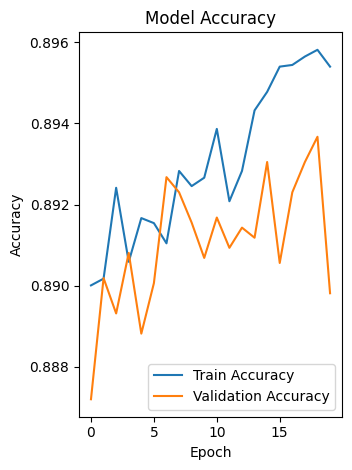

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

The code in the cell below was utilized from Xpert learning asssistant

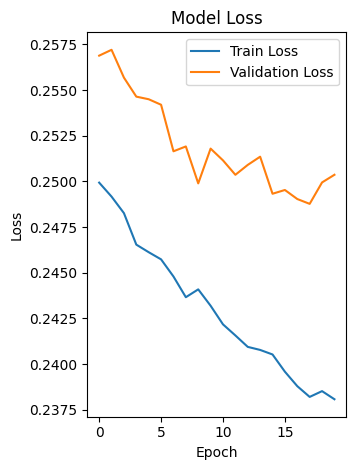

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()